## Importing Libraries & Data

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [110]:
%matplotlib inline

In [111]:
# Define path

path = r'C:\Users\alexi\OneDrive\Gun Violence'

In [112]:
# Import data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'flagged_data'))

In [113]:
df.shape

(239677, 19)

In [114]:
df.head(2)

,Unnamed: 0,date,state,city_or_county,count_killed,count_injured,congressional_district,stolen_gun,gun_type,latitude,longitude,count_guns_involved,participant_age,state_house_district,state_senate_district,mass_casualty,mass_shooting,red_state,kill_count
0,0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,40.3467,-79.8559,NaN,0::20,NaN,NaN,NO,YES,BLUE,Low
1,1,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,33.9090,-118.3330,NaN,0::20,62.0,35.0,NO,NO,BLUE,Low


In [115]:
df = df.drop(columns = {'Unnamed: 0', 'date', 'state', 'city_or_county', 'stolen_gun', 'gun_type','participant_age', 'mass_casualty', 'mass_shooting', 'red_state', 'kill_count', 'count_guns_involved', 'congressional_district', 'state_house_district', 'state_senate_district'})

In [116]:
df.head(20)

,count_killed,count_injured,latitude,longitude
0,0,4,40.3467,-79.8559
1,1,3,33.9090,-118.3330
2,1,3,41.4455,-82.1377
3,4,0,39.6518,-104.8020
4,2,2,36.1140,-79.9569
5,4,0,36.2405,-95.9768
6,5,0,34.9791,-106.7160
7,0,5,29.9435,-90.0836
8,0,4,37.9656,-121.7180
9,1,6,39.2899,-76.6412


In [117]:
df.describe()

,count_killed,count_injured,latitude,longitude
count,239677.000000,239677.000000,231754.000000,231754.000000
mean,0.252290,0.494007,37.546598,-89.338348
std,0.521779,0.729952,5.130763,14.359546
min,0.000000,0.000000,19.111400,-171.429000
25%,0.000000,0.000000,33.903400,-94.158725
50%,0.000000,0.000000,38.570600,-86.249600
75%,0.000000,1.000000,41.437375,-80.048625
max,50.000000,53.000000,71.336800,97.433100


In [118]:
df.isnull().sum()

count_killed        0
count_injured       0
latitude         7923
longitude        7923
dtype: int64

In [121]:
df = df.dropna(subset=['latitude'])

In [122]:
df.isnull().sum()

count_killed     0
count_injured    0
latitude         0
longitude        0
dtype: int64

## Elbow Technique

In [123]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [124]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-54073980.01677602,
 -19666192.946205586,
 -12442194.619334871,
 -9793265.820045523,
 -7435848.678868512,
 -5591893.735425877,
 -4731141.418233805,
 -4253982.246554082,
 -3741361.8524792315]

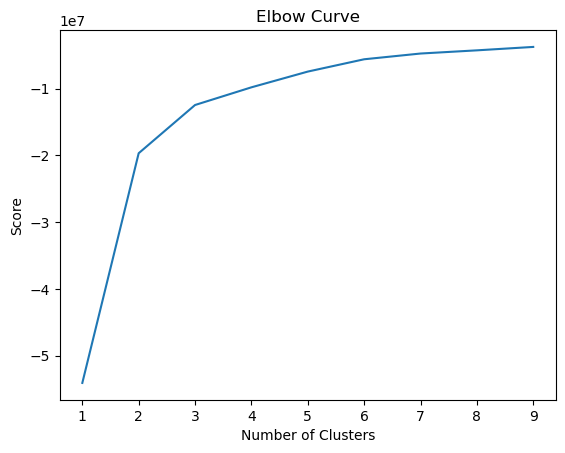

In [125]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump from 2 to 3 on the x-axis and after that the  line straightens out. This tells us that 3 is the optimal amount of clusters.

## K-means Clustering

In [126]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [127]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [128]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\alexi\AppData\Local\Temp\ipykernel_17996\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [129]:
df.head()

,count_killed,count_injured,latitude,longitude,clusters
0,0,4,40.3467,-79.8559,0
1,1,3,33.9090,-118.3330,1
2,1,3,41.4455,-82.1377,0
3,4,0,39.6518,-104.8020,2
4,2,2,36.1140,-79.9569,0


In [130]:
df['clusters'].value_counts()

0    107032
2     92883
1     31839
Name: clusters, dtype: int64

## Plot the clusters

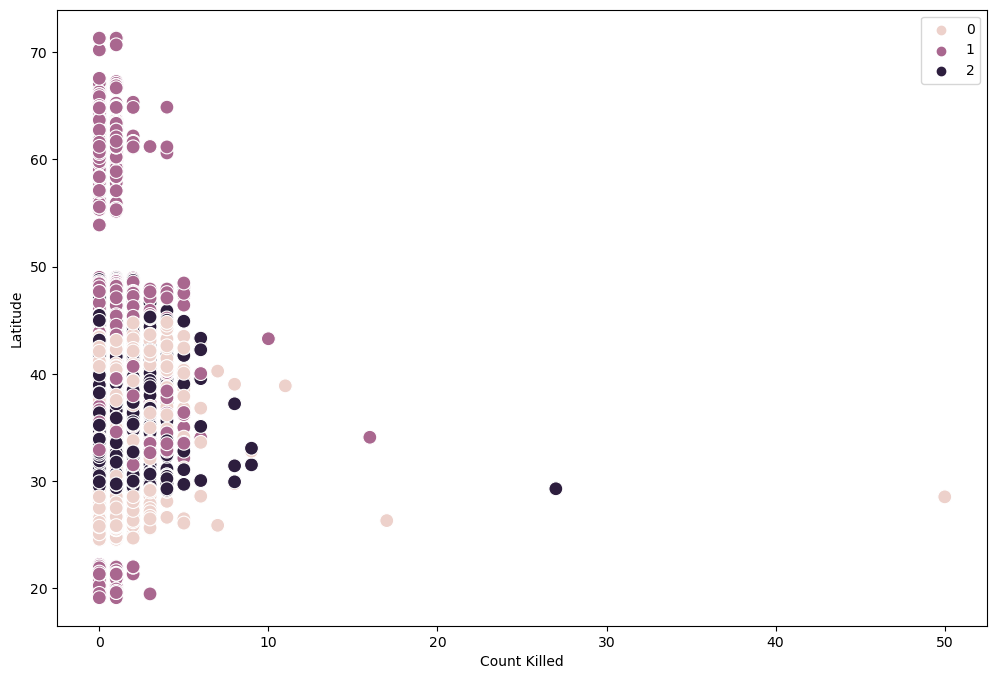

In [131]:
# Plot the clusters for the "Count Killed" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['count_killed'], y=df['latitude'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Count Killed') 
plt.ylabel('Latitude')
plt.show()

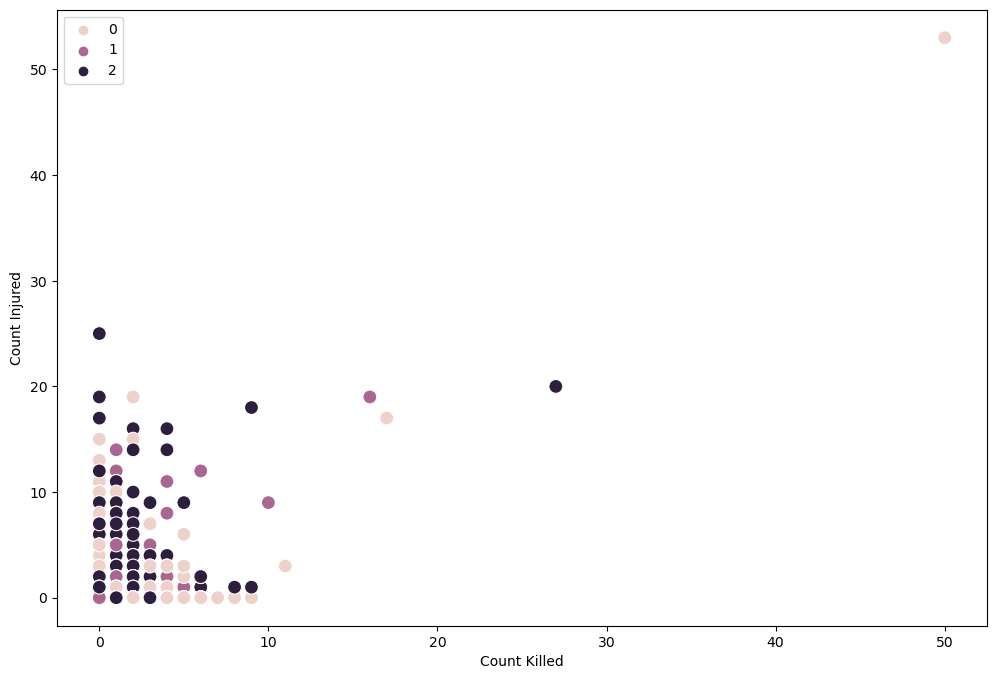

In [132]:
# Plot the clusters for the "Count Killed" and "Count Injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['count_killed'], y=df['count_injured'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Count Killed') 
plt.ylabel('Count Injured')
plt.show()

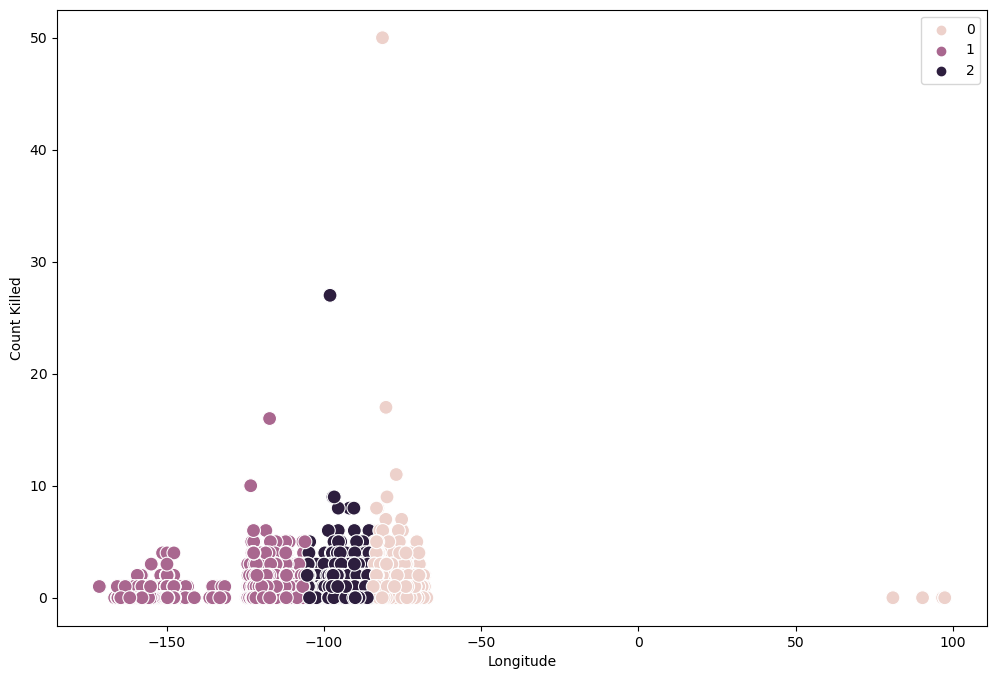

In [134]:
# Plot the clusters for the "Count Killed" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['longitude'], y=df['count_killed'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Longitude') 
plt.ylabel('Count Killed')
plt.show()

The only plot that makes any sense is the last one talking about the relationship between count killed and longitude. The clusters seem to be grouped purely based off of longitude so any shootings in that region are grouped together.

In [135]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\alexi\AppData\Local\Temp\ipykernel_17996\4155924145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [137]:
df.groupby('cluster').agg({'count_killed':['mean', 'median'], 
                         'count_injured':['mean', 'median'], 
                         'latitude':['mean', 'median'],
                          'longitude':['mean', 'median']})

count_killed        count_injured          latitude           \
                    mean median          mean median       mean   median   
cluster                                                                    
dark purple     0.253469    0.0      0.533262    0.0  36.956345  37.6632   
pink            0.221812    0.0      0.485294    0.0  37.571107  39.2940   
purple          0.310751    0.0      0.410252    0.0  39.186138  37.6167   

              longitude             
                   mean     median  
cluster                             
dark purple  -91.317742  -90.04360  
pink         -78.653707  -79.34085  
purple      -119.482087 -119.15800